<a href="https://colab.research.google.com/github/raymondzhao1/csm-61a/blob/main/tree_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3/3: Immutable Trees (ADT)

Run below cell (CS 61A's ADT tree implementation) before doing the problems.

In [ ]:
def tree(label, branches=[]):
    """Construct a tree with the given label value and a list of branches."""
    return [label] + list(branches)

def label(tree):
    """Return the label value of a tree."""
    return tree[0]

def branches(tree):
    """Return the list of branches of the given tree."""
    return tree[1:]

def is_leaf(tree):
    """Returns True if the given tree's list of branches is empty, and False
    otherwise.
    """
    return not branches(tree)

## Q1: Flood

In [ ]:
def flood(t):
    """
    Water floods in the direction from the root of a tree toward its leaves.
    At the leaves are n-sized walls, containing the flood, 
    composed of n '-'s concatenated together.
    Every other node is flowing water, represented by an arbitrary number of '{'s.
    When flood is called, water flows downstream, damaging a chunk of the wall and removing a '-'.
    Once all '-'s have been chipped away, the water pushes the fragment of the wall downstream infinitely.
    The number of resulting fragments should equal the size of the wall n.
    Write a function that takes a tree and returns the tree after one iteration
    of water flow, with behavior as described above.
    Instead of doctests, refer to the images in the below cell.
    """
    # Hint: letter_count might be useful.
    if is_leaf(t) and ____________________ == 0:
        n = ___________
        fragments = ___________________
        return tree(n * '{', fragments)
    if is_leaf(t):
        return ______________________
    else:
        return tree(label(t), [__________________________])

In [ ]:
def letter_count(word, letter):
  """ 
  Return number of times letter appears in word.
  >>> letter_count('mississppi', 's')
  4
  """
  return len([c for c in word if c == letter])

61a viz (2).svg

61a viz (3).svg

61a viz (5).svg

61a viz (7).svg

61a viz (8).svg

In [ ]:
t = tree('{{{', [tree('{{{', [tree('---'), tree('--')]), tree('{{{', [tree('----'), tree('------')])])
exp1 = ['{{{', ['{{{', ['{--'], ['{-']], ['{{{', ['{---'], ['{-----']]]
exp2 = ['{{{', ['{{{', ['{{-'], ['{{']], ['{{{', ['{{--'], ['{{----']]]
exp3 = ['{{{', ['{{{', ['{{{'], ['{{', ['-'], ['-']]], ['{{{', ['{{{-'], ['{{{---']]]
exp4 = ['{{{', ['{{{', ['{{{', ['-'], ['-'], ['-']], ['{{', ['{'], ['{']]], ['{{{', ['{{{{'], ['{{{{--']]]
assert flood(t) == exp1, f'Expected {exp1}, but got {t}.'
assert flood(flood(t)) == exp2, f'Expected {exp2}, but got {t}.'
assert flood(flood(flood(t))) == exp3, f'Expected {exp3}, but got {t}.'
assert flood(flood(flood(flood(t)))) == exp4, f'Expected {exp4}, but got {t}.'

## Q2: Path of Least Resistance

In [ ]:
def lazy(t):
    """
    Takes an integer tree and returns a list of the labels along the path of least resistance.
    This path is defined as the one that minimizes the absolute pairwise difference
    between each node and its subsequent node. If two paths have the same difference, either path is fine.
    i.e. the next node in a path should have as small of difference with the current node as possible.
    >>> t = tree(2, [tree(7, [tree(3), tree(6, [tree(5), tree(11)])] ), tree(15)])
    >>> lazy(2)
    [2, 7, 6, 5]
    """
    if is_leaf(t):
        return [label(t)]
    else:
        min_path = _______________________________________________
        curr_path = __________________      
        return _________ + curr_path

61a viz (1).svg
Q2 Tests:

In [ ]:
t = tree(1, 
         [tree(3, 
               [tree(7, 
                     [tree(20), tree(-4), tree(1)]), 
                tree(5, 
                     [tree(1), 
                      tree(8, 
                           [tree(16), tree(0)])])])])
test = lazy(t)
exp = [1, 3, 5, 8, 16]
assert test == exp, f'Expected {exp}, but got {test}.'

t = tree(0, [t, tree(0)])
test = lazy(t)
exp = [0, 0]
assert test == exp, f'Expected {exp}, but got {test}.'

# **3/24: Mutable Trees**

Run below cell (CS 61A's Tree class implementation) before doing the problems.

In [2]:
class Tree:
    """
    >>> t = Tree(3, [Tree(2, [Tree(5)]), Tree(4)])
    >>> t.label
    3
    >>> t.branches[0].label
    2
    >>> t.branches[1].is_leaf()
    True
    """
    def __init__(self, label, branches=[]):
        for b in branches:
            assert isinstance(b, Tree)
        self.label = label
        self.branches = list(branches)

    def is_leaf(self):
        return not self.branches
   
    def __repr__(self):
      if self.branches:
        return 'Tree({0}, {1})'.format(self.label, repr(self.branches))
      else:
        return 'Tree({0})'.format(repr(self.label))

## **Q1: Overthrow**

In [ ]:
def overthrow(t, x):
  """
  Write a function that takes tree 't' and bubbles 'x' to the root.
  The 'bubble' process entails swapping 'x' with its parent until
  it is located at the root. Assume that all nodes are unique,
  although the tree may not contain 'x'.
  """
  for b in t.branches:
    _______________ 
    if _______________:
      ___________, ___________ = ___________, ___________

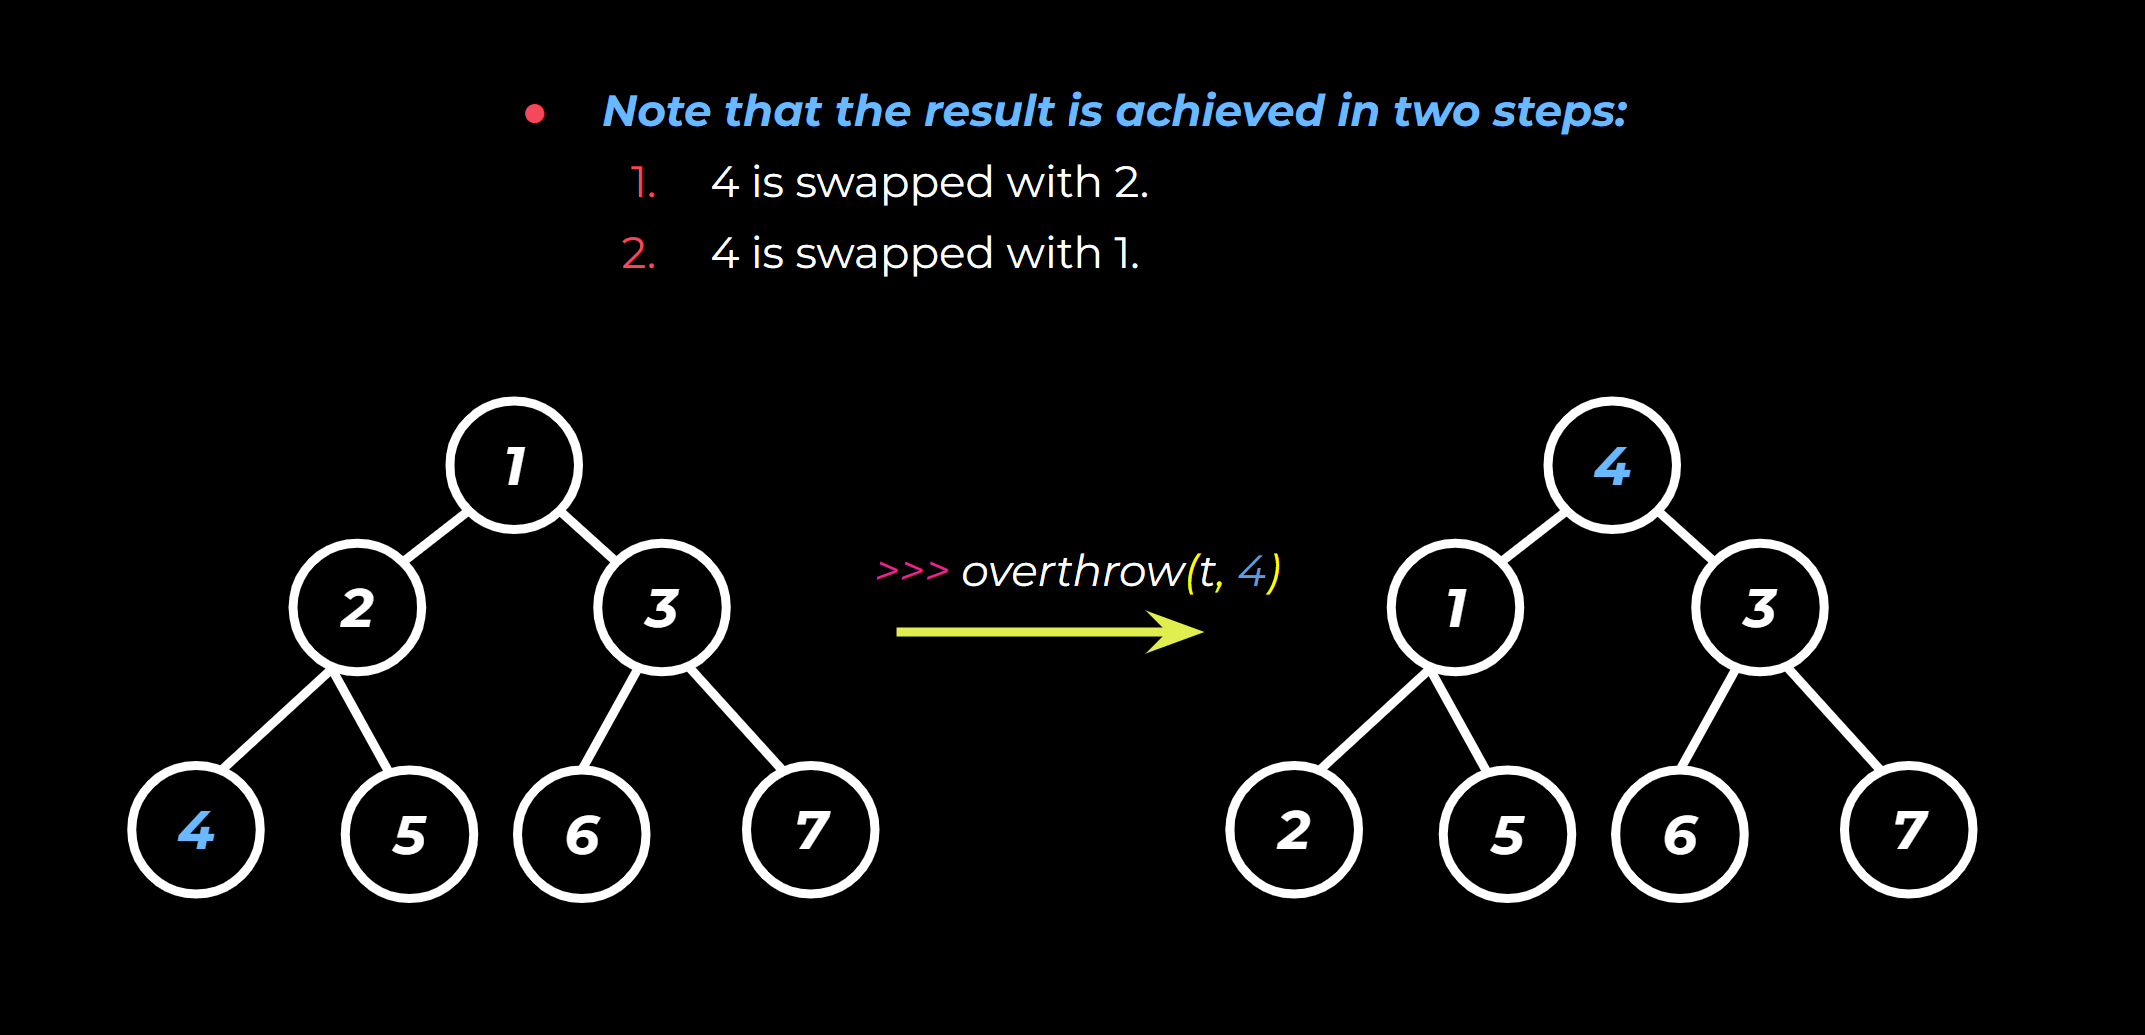

Q1 Tests:

In [ ]:
t = Tree(1, [Tree(2, [Tree(4), Tree(5), Tree(3, [Tree(6), Tree(7)])])])
overthrow(t, 4)
t
# Should be 
# Tree(4, [Tree(1, [Tree(2), Tree(5), Tree(3, [Tree(6), Tree(7)])])])

Tree(4, [Tree(1, [Tree(2), Tree(5), Tree(3, [Tree(6), Tree(7)])])])

## **Q2: Delete & Displace**

In [3]:
def delete(t, x):
  """
  Delete any occurrence of the 'x' within Tree 't'. When a non-leaf
  node is deleted, the node's children should point to the node's
  parent. The order of the branches must be preserved.
  Assume that the root will never be deleted.
  """
  for i in range(________________)[::-1]:
    b = t.branches[i]
    _______________
    if b.label == x:
      t.branches = _______________ + _______________ + _______________

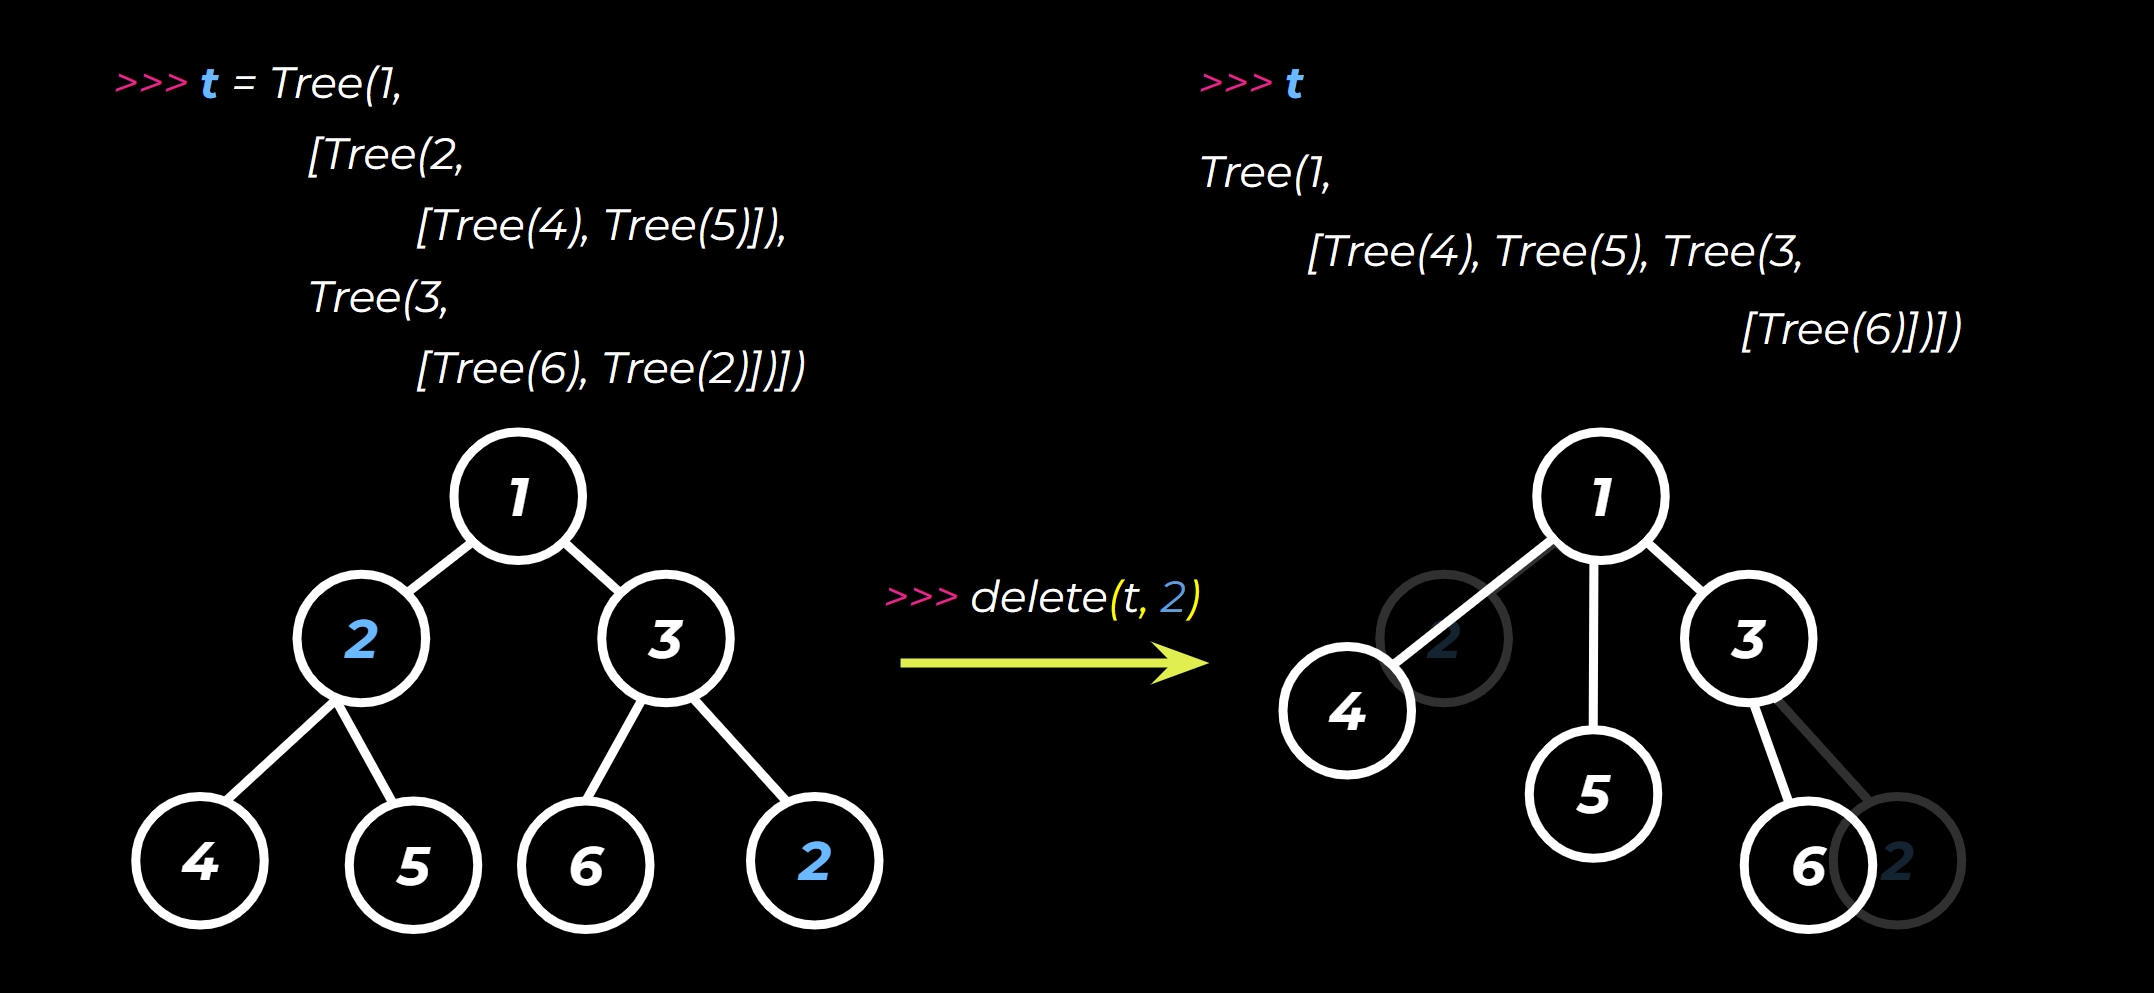

Q2 Tests:

In [5]:
t = Tree(3, [Tree(2, [Tree(2), Tree(2)]), Tree(2), Tree(2, [Tree(2, [Tree(2), Tree(2)])])])
delete(t, 2)
# Should be
# Tree(3)

AssertionError: ignored